In [1]:
!pip install tensorflow

#Without Gradio Interface


In [2]:
#import the packages
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import files
import io
from PIL import Image

In [3]:
# Upload first image
print("Upload first image:")
uploaded = files.upload()

Upload first image:


Saving 007.png to 007.png


In [4]:
# Read first uploaded image
im1 = tf.image.decode_image(uploaded[list(uploaded.keys())[0]])

In [5]:
# Upload second image
print("\nUpload second image:")
uploaded = files.upload()


Upload second image:


Saving 008.png to 008.png


In [6]:
# Read second uploaded image
im2 = tf.image.decode_image(uploaded[list(uploaded.keys())[0]])

In [7]:
# Resize images to the same dimensions
im1 = tf.image.resize(im1, [255, 255])
im2 = tf.image.resize(im2, [255, 255])

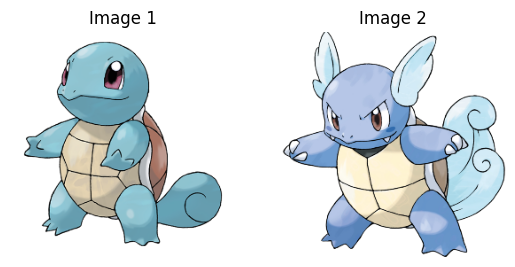

In [8]:
# Display uploaded images
plt.subplot(1, 2, 1)
plt.imshow(im1.numpy().astype('uint8'))
plt.title('Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(im2.numpy().astype('uint8'))
plt.title('Image 2')
plt.axis('off')

plt.show()

In [10]:
# Function definition
def compute_ssim(im1, im2):
    # Add an outer batch for each image
    im1 = tf.expand_dims(im1, axis=0)
    im2 = tf.expand_dims(im2, axis=0)

    # Compute SSIM over tf.uint8 Tensors
    ssim1 = tf.image.ssim(im1, im2, max_val=255, filter_size=11,
                          filter_sigma=1.5, k1=0.01, k2=0.03)

    # Convert images to tf.float32
    im1 = tf.image.convert_image_dtype(im1, tf.float32)
    im2 = tf.image.convert_image_dtype(im2, tf.float32)

    # Compute SSIM over tf.float32 Tensors
    ssim2 = tf.image.ssim(im1, im2, max_val=1.0, filter_size=11,
                          filter_sigma=1.5, k1=0.01, k2=0.03)

    # Take the mean SSIM value across all channels
    mean_ssim = tf.reduce_mean([ssim1, ssim2])

    return mean_ssim

In [11]:
#SSIM Value
ssim_value = compute_ssim(im1, im2).numpy()
print("SSIM value:", ssim_value)

# Map SSIM value to percentage scale
similarity_percentage = ssim_value * 100
print("Similarity percentage:", similarity_percentage)

SSIM value: 0.28202456
Similarity percentage: 28.20245623588562


#Via Gradio Interface


In [13]:
!pip install gradio

In [14]:
#import the packages
import tensorflow as tf
import gradio as gr
import numpy as np

In [15]:
#function definition
def compute_ssim(im1, im2):
    # Resize images to the same dimensions
    im1 = tf.image.resize(im1, [255, 255])
    im2 = tf.image.resize(im2, [255, 255])

    # Add an outer batch for each image
    im1 = tf.expand_dims(im1, axis=0)
    im2 = tf.expand_dims(im2, axis=0)

    # Compute SSIM over tf.uint8 Tensors
    ssim1 = tf.image.ssim(im1, im2, max_val=255, filter_size=11,
                          filter_sigma=1.5, k1=0.01, k2=0.03)

    # Convert images to tf.float32
    im1 = tf.image.convert_image_dtype(im1, tf.float32)
    im2 = tf.image.convert_image_dtype(im2, tf.float32)

    # Compute SSIM over tf.float32 Tensors
    ssim2 = tf.image.ssim(im1, im2, max_val=1.0, filter_size=11,
                          filter_sigma=1.5, k1=0.01, k2=0.03)

    # Take the mean SSIM value across all channels
    mean_ssim = tf.reduce_mean([ssim1, ssim2])

    return mean_ssim.numpy()

def ssim_similarity(image1, image2):
    # Convert bytes data to numpy array
    im1 = np.array(image1).astype(np.uint8)
    im2 = np.array(image2).astype(np.uint8)

    # Compute SSIM
    similarity = compute_ssim(im1, im2)
    similarity_percentage = similarity * 100

    return similarity_percentage

In [17]:
#interface
iface = gr.Interface(
    fn=ssim_similarity,
    inputs=["image", "image"],
    outputs="text",
    title="Image Similarity Checker",
    description="Upload two images and get the similarity percentage based on SSIM."
)

iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://291570c44c30e6f8c9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
